In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
crime_df = pd.read_csv("crime.csv")
crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
missing_data = crime_df.isnull().sum()
data_types = crime_df.dtypes
duplicate_count = crime_df.duplicated().sum()
missing_data, data_types, duplicate_count

(TYPE                 0
 YEAR                 0
 MONTH                0
 DAY                  0
 HOUR             54362
 MINUTE           54362
 HUNDRED_BLOCK       13
 NEIGHBOURHOOD    56624
 X                    0
 Y                    0
 Latitude             0
 Longitude            0
 dtype: int64,
 TYPE              object
 YEAR               int64
 MONTH              int64
 DAY                int64
 HOUR             float64
 MINUTE           float64
 HUNDRED_BLOCK     object
 NEIGHBOURHOOD     object
 X                float64
 Y                float64
 Latitude         float64
 Longitude        float64
 dtype: object,
 48838)

In [4]:
cleaned_data = crime_df.dropna(subset=['NEIGHBOURHOOD', 'HUNDRED_BLOCK'])
original_shape = crime_df.shape
cleaned_shape = cleaned_data.shape
original_shape, cleaned_shape

((530652, 12), (474015, 12))

In [5]:
cleaned_data_unique = cleaned_data.drop_duplicates()
unique_cleaned_shape = cleaned_data_unique.shape
unique_cleaned_shape

(474014, 12)

In [6]:
type_categories = cleaned_data['TYPE'].unique()
neighbourhood_categories = cleaned_data_unique['NEIGHBOURHOOD'].unique()
type_categories, neighbourhood_categories

(array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
        'Break and Enter Commercial', 'Theft from Vehicle',
        'Vehicle Collision or Pedestrian Struck (with Injury)',
        'Vehicle Collision or Pedestrian Struck (with Fatality)',
        'Theft of Vehicle', 'Theft of Bicycle'], dtype=object),
 array(['Strathcona', 'Kerrisdale', 'Dunbar-Southlands',
        'Grandview-Woodland', 'Sunset', 'West End',
        'Central Business District', 'Hastings-Sunrise',
        'Victoria-Fraserview', 'Fairview', 'Kensington-Cedar Cottage',
        'West Point Grey', 'Shaughnessy', 'Renfrew-Collingwood',
        'Killarney', 'Riley Park', 'Arbutus Ridge', 'Musqueam',
        'Mount Pleasant', 'Kitsilano', 'Stanley Park', 'South Cambie',
        'Marpole', 'Oakridge'], dtype=object))

In [7]:
crime_type_counts = cleaned_data_unique['TYPE'].value_counts()
crime_neighbourhood_counts = cleaned_data_unique['NEIGHBOURHOOD'].value_counts()
crime_type_counts, crime_neighbourhood_counts

(Theft from Vehicle                                        170888
 Mischief                                                   70157
 Break and Enter Residential/Other                          60856
 Other Theft                                                52160
 Theft of Vehicle                                           38351
 Break and Enter Commercial                                 33841
 Theft of Bicycle                                           25620
 Vehicle Collision or Pedestrian Struck (with Injury)       21887
 Vehicle Collision or Pedestrian Struck (with Fatality)       254
 Name: TYPE, dtype: int64,
 Central Business District    110944
 West End                      41352
 Fairview                      32161
 Mount Pleasant                30534
 Grandview-Woodland            27180
 Renfrew-Collingwood           26761
 Kitsilano                     26698
 Kensington-Cedar Cottage      24941
 Strathcona                    20917
 Hastings-Sunrise              18126
 Sunset  

In [8]:
crime_df = crime_df.dropna()
print(crime_df)

                                                     TYPE  YEAR  MONTH  DAY  \
0                                             Other Theft  2003      5   12   
1                                             Other Theft  2003      5    7   
2                                             Other Theft  2003      4   23   
3                                             Other Theft  2003      4   20   
4                                             Other Theft  2003      4   12   
...                                                   ...   ...    ...  ...   
530646                                           Mischief  2017      1   18   
530647                  Break and Enter Residential/Other  2017      3    3   
530648                                           Mischief  2017      5   29   
530650                                 Theft from Vehicle  2017      6    5   
530651  Vehicle Collision or Pedestrian Struck (with I...  2017      6    6   

        HOUR  MINUTE       HUNDRED_BLOCK           

In [9]:
nan_count = crime_df.isnull().sum().sum()
print('Number of NaN values:', nan_count)
null_count = crime_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of NaN values: 0
Number of null values: 0


## Hypothesis Testing (ANOVA Test)

In [11]:
import scipy.stats as stats

anova_data = cleaned_data_unique.groupby(['NEIGHBOURHOOD', 'YEAR'])['TYPE'].count().reset_index()
anova_results = stats.f_oneway(*(anova_data[anova_data['NEIGHBOURHOOD'] == n] ['TYPE'] for n in anova_data['NEIGHBOURHOOD'].unique()))

anova_results

F_onewayResult(statistic=134.487697366341, pvalue=3.0756777109719445e-154)

In [12]:
crime_counts_per_neighbourhood = cleaned_data_unique.groupby('NEIGHBOURHOOD').size().reset_index(name='Total Crimes')
crime_stats_per_neighbourhood = cleaned_data_unique.groupby(['NEIGHBOURHOOD', 'YEAR'])['TYPE'].count().groupby('NEIGHBOURHOOD').mean().reset_index(name='Average Annual Crimes')
neighbourhood_crime_data = pd.merge(crime_counts_per_neighbourhood, crime_stats_per_neighbourhood, on='NEIGHBOURHOOD')
neighbourhood_crime_data.head()

,NEIGHBOURHOOD,Total Crimes,Average Annual Crimes
0,Arbutus Ridge,6066,404.400000
1,Central Business District,110944,7396.266667
2,Dunbar-Southlands,7746,516.400000
3,Fairview,32161,2144.066667
4,Grandview-Woodland,27180,1812.000000


## Multiple Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = crime_df.drop('TYPE', axis=1).values
y = crime_df['NEIGHBOURHOOD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)

In [24]:
import statsmodels.api as sm

regression_data = anova_data.pivot_table(index='YEAR', columns='NEIGHBOURHOOD', values='TYPE', aggfunc='mean').fillna(0)
regression_data_long = regression_data.reset_index().melt(id_vars='YEAR', var_name='NEIGHBOURHOOD', value_name='AVERAGE_CRIMES')

X = sm.add_constant(regression_data_long['YEAR'])
y = regression_data_long['AVERAGE_CRIMES']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         AVERAGE_CRIMES   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     9.930
Date:                Sun, 05 May 2024   Prob (F-statistic):            0.00176
Time:                        12:53:59   Log-Likelihood:                -3145.1
No. Observations:                 360   AIC:                             6294.
Df Residuals:                     358   BIC:                             6302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.18e+05    3.7e+04      3.187      0.0

In [15]:
crime_labels = ['Low', 'Medium', 'High']
neighbourhood_crime_data['Crime Category'] = pd.qcut(neighbourhood_crime_data['Total Crimes'], q=3, labels=crime_labels)

X = neighbourhood_crime_data[['Total Crimes']]
y = neighbourhood_crime_data['Crime Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

training_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

training_score, test_score

(0.9473684210526315, 1.0)

# Data Charts

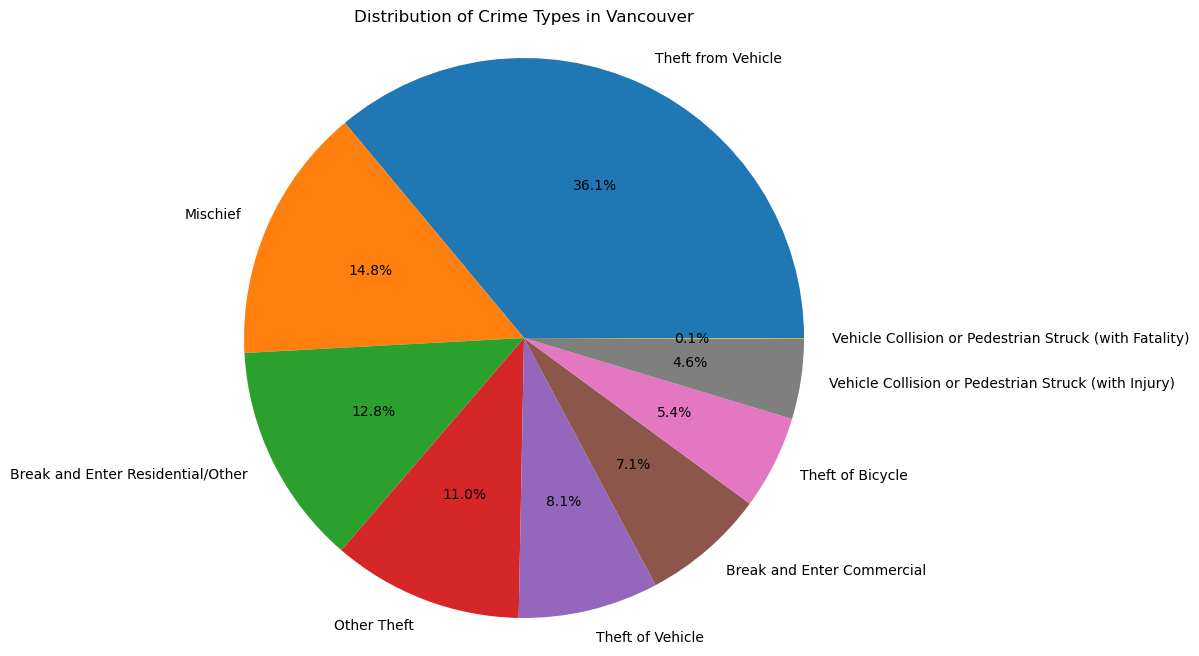

In [16]:
# Pie Chart

plt.figure(figsize=(10, 8))
plt.pie(crime_type_counts, labels=crime_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Crime Types in Vancouver')
plt.axis('equal')
plt.show()

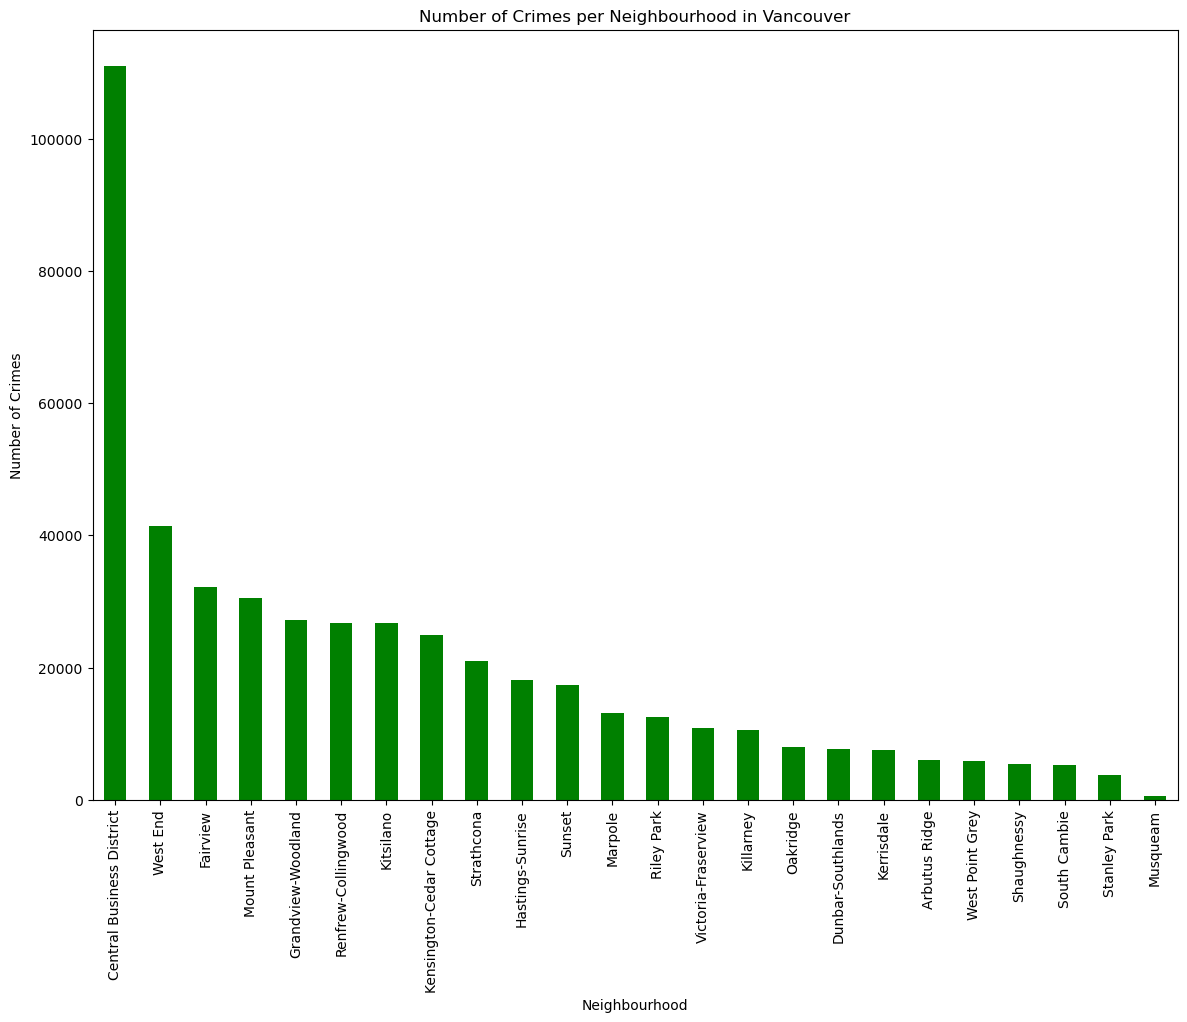

In [17]:
# Bar Chart

plt.figure(figsize=(14, 10))
crime_neighbourhood_counts.plot(kind='bar', color='green')
plt.title('Number of Crimes per Neighbourhood in Vancouver')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Crimes')
plt.show()

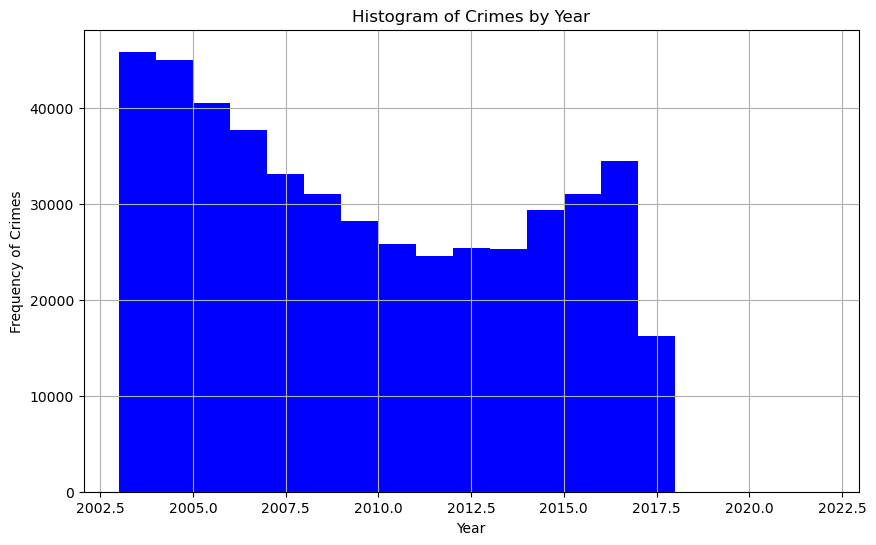

In [18]:
# Histogram

plt.figure(figsize=(10, 6))
cleaned_data_unique['YEAR'].hist(bins=range(2003, 2023), color='blue')
plt.title('Histogram of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Frequency of Crimes')
plt.show()